In [2]:
import math
import numpy as np
from math import sqrt
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
from scipy.stats import norm
from scipy.stats import lognorm
import seaborn as sns
sns.set()
sns.set_style('white')

In [3]:
# load file, skip header, load angles and coordinates, also grain ID
coords=np.loadtxt('Raw Data/AZ31B Tcomp 10e0 Int_2 raw1.txt', skiprows=17, usecols=(3,4))
grain_IDs=np.loadtxt('Raw Data/AZ31B Tcomp 10e0 Int_2 raw1.txt', skiprows=17, usecols=(8))
coords_and_grains=np.loadtxt('Raw Data/AZ31B Tcomp 10e0 Int_2 raw1.txt', skiprows=17, usecols=(3,4,8))
coords_and_grains_copy=np.copy(coords_and_grains)
#load more files or start grid in other three corners?

In [4]:
def kl_divergence(p, q):
    return np.sum(np.where((q != 0), p * np.log2(p / q), 0))
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [5]:
def grain_square(percent):
    percent=percent/100
    row_list=[]
    for index in range(0,len(coords_and_grains)):
        if (coords_and_grains_copy[index,0]<=int((110*percent))) and (coords_and_grains_copy[index,1]<=int((110*percent))):
            row_list.append(coords_and_grains_copy[index])
        else:
            continue

    row_tuple=tuple(row_list)
    coords_and_grains_slice=np.vstack(row_tuple)
    uniquegrains=np.unique(coords_and_grains_slice[:,2],return_counts=True)
    ID, count = uniquegrains
    params = lognorm.fit(count)
    xvals = np.linspace(0, 200, num=200)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    s = pdf(xvals)
    s[s==0]=[0.000001]
    #return s
    return coords_and_grains_slice[:,0], coords_and_grains_slice[:,1]
    #return count

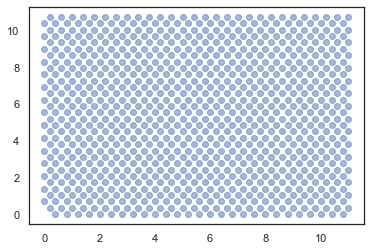

In [6]:
xcoords, ycoords = grain_square(10)
plt.scatter(xcoords, ycoords, marker="o", alpha=0.5)

In [7]:
print(coords)

[[  0.4       0.     ]
 [  0.8       0.     ]
 [  1.2       0.     ]
 ...
 [104.2     104.96228]
 [104.6     104.96228]
 [105.      104.96228]]


In [35]:
print(coords_and_grains[:,0:2])

[[  0.4       0.     ]
 [  0.8       0.     ]
 [  1.2       0.     ]
 ...
 [104.2     104.96228]
 [104.6     104.96228]
 [105.      104.96228]]


In [38]:
print([coords[5]])

[array([2.4, 0. ])]


In [36]:
import numpy as np
samples = coords
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(radius=0.5)
neigh.fit(samples)
NearestNeighbors(radius=0.5)
rng = neigh.radius_neighbors([coords[5]])
print(np.asarray(rng[0][0]))
print(np.asarray(rng[1][0]))
bite=np.asarray(rng[1][0])

[0.4        0.39999986 0.         0.4        0.39999986]
[  4 268   5   6 269]


In [40]:
print(coords_and_grains[4])

[2. 0. 1.]


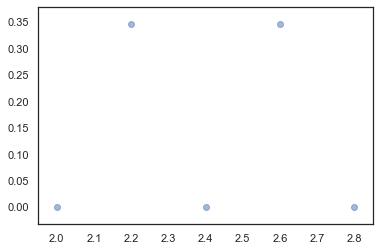

In [37]:
xcoords, ycoords = grain_square(100)
xcoords_bite=xcoords[bite]
ycoords_bite=ycoords[bite]
plt.scatter(xcoords_bite,  ycoords_bite, marker="o", alpha=0.5)
#0.5 gives good values

In [ ]:
import numpy as np
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(radius=1.6)
neigh.fit(samples)
NearestNeighbors(radius=1.6)
rng = neigh.radius_neighbors([[1., 1., 1.]])
print(np.asarray(rng[0][0]))
[1.5 0.5]print(np.asarray(rng[1][0]))
[1 2]

In [7]:
#PDF of all pixels
uniquegrains=np.unique(grain_IDs,return_counts=True)
ID, count = uniquegrains
params = lognorm.fit(count)
xvals = np.linspace(0, 200, num=200)
pdf = lambda x: lognorm.pdf(xvals, *params)
t = pdf(xvals)
t[t==0]=[0.000001]

Text(0, 0.5, 'Probability Density')

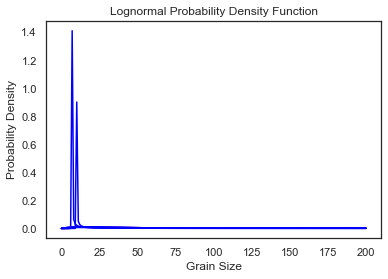

In [9]:
fig, ax = plt.subplots()
plt.plot(xvals, t, color='red')
#under 20 there is odd behavior, similar to sharp oscillations out of range with JS Divergence at small values...ask
for percent in range (20,100,10):
    plt.plot(xvals, grain_square(percent), color='blue')
plt.title("Lognormal Probability Density Function")
plt.xlabel('Grain Size')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Frequency')

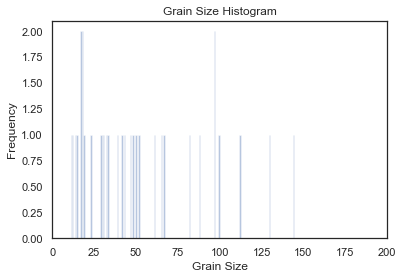

In [62]:
#at 15, histogram loses shape
sns.distplot(grain_square(15), hist=True, bins=250, kde=False)
plt.xlim(0, 200)
plt.title("Grain Size Histogram")
plt.xlabel('Grain Size')
plt.ylabel('Frequency')

In [69]:
x4=[]
y4=[]
for percent in range(20,100,1):
    x4.append(percent)
    y4.append(js_divergence(t,grain_square(percent)))

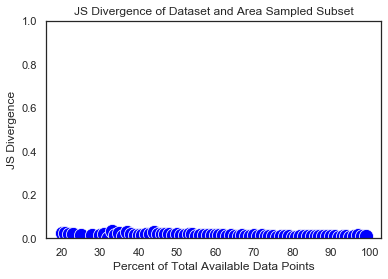

In [71]:
plt.title('JS Divergence of Dataset and Area Sampled Subset')
plt.xlabel('Percent of Total Available Data Points')
plt.ylabel('JS Divergence')
plt.ylim(0, 1)
sns.scatterplot(x4, y4, s=200, color="blue", marker="o")
#seems almost too good, it simply finding something close enough to the average grain size enough?

In [ ]:
#see how sampling a window (ie one tenth of the area) compares tp grid sampling 10% of the image
#go through greedy algorithm take anything around to it, go through again and merge
#double edges, quadruple double edge, have variable to keep track of grain number, use column to show if edge
#map=np.zeros((,))

In [14]:
# def misorientation(euler_one, euler_two):
#     #orientation matrices
#     g_one=np.array([[((math.cos(euler_one[0]))*(math.cos(euler_one[2]))-(math.sin(euler_one[0]))*(math.sin(euler_one[2]))*(math.cos(euler_one[1]))),((math.sin(euler_one[0]))*(math.cos(euler_one[2]))+(math.cos(euler_one[0]))*(math.sin(euler_one[2]))*(math.cos(euler_one[1]))),((math.sin(euler_one[2]))*(math.sin(euler_one[1])))],
#                 [(-(math.cos(euler_one[0]))*(math.sin(euler_one[2]))-(math.sin(euler_one[0]))*(math.cos(euler_one[2]))*(math.cos(euler_one[1]))),(-(math.sin(euler_one[0]))*(math.sin(euler_one[2]))+(math.cos(euler_one[0]))*(math.cos(euler_one[2]))*(math.cos(euler_one[1]))),((math.cos(euler_one[2]))*(math.sin(euler_one[1])))],
#                 [((math.sin(euler_one[0]))*(math.sin(euler_one[1]))),(-(math.cos(euler_one[0]))*(math.sin(euler_one[1]))),(math.cos(euler_one[1]))]        
#                 ])
   
#     #euler_two
#     g_two=np.array([[((math.cos(euler_two[0]))*(math.cos(euler_two[2]))-(math.sin(euler_two[0]))*(math.sin(euler_two[2]))*(math.cos(euler_two[1]))),((math.sin(euler_two[0]))*(math.cos(euler_two[2]))+(math.cos(euler_two[0]))*(math.sin(euler_two[2]))*(math.cos(euler_two[1]))),((math.sin(euler_two[2]))*(math.sin(euler_two[1])))],
#                 [(-(math.cos(euler_two[0]))*(math.sin(euler_two[2]))-(math.sin(euler_two[0]))*(math.cos(euler_two[2]))*(math.cos(euler_two[1]))),(-(math.sin(euler_two[0]))*(math.sin(euler_two[2]))+(math.cos(euler_two[0]))*(math.cos(euler_two[2]))*(math.cos(euler_two[1]))),((math.cos(euler_two[2]))*(math.sin(euler_two[1])))],
#                 [((math.sin(euler_two[0]))*(math.sin(euler_two[1]))),(-(math.cos(euler_two[0]))*(math.sin(euler_two[1]))),(math.cos(euler_two[1]))]        
#                 ])
    
#     #misorientation matrix
#     delta_g=np.dot(g_one,np.linalg.inv(g_two))
                     
    
#     #misorientation angle
#     #error handling for rounding errors outside of domain
#     try:
#         theta=math.acos((delta_g[0,0]+delta_g[1,1]+delta_g[2,2]-1)/2)
#     except:
#         if (((delta_g[0,0]+delta_g[1,1]+delta_g[2,2]-1)/2)>1):
#             theta=0
#         else:
#             theta=180

#     return math.degrees(theta)